

---



---



---


# 🐳 Human Detection Pipeline


---



---



---



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Dataset structure: ['labels', 'images']


Copying files: 701 files [03:17,  3.54 files/s]


✅ data.yaml created at /content/drive/MyDrive/data/data.yaml


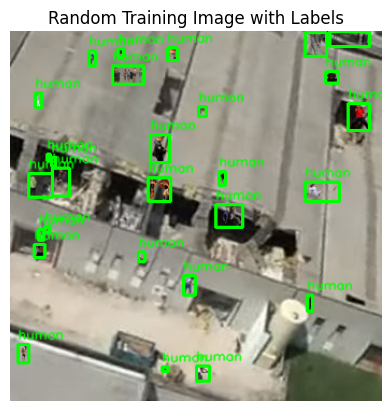

Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/data/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

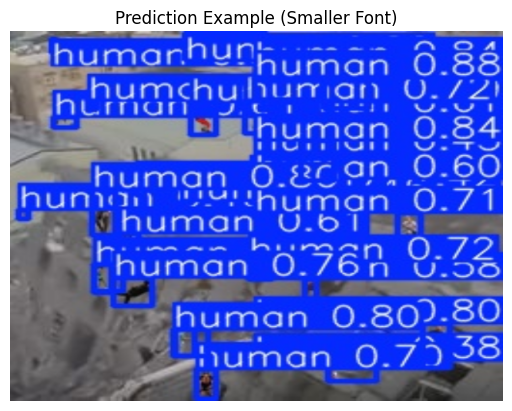

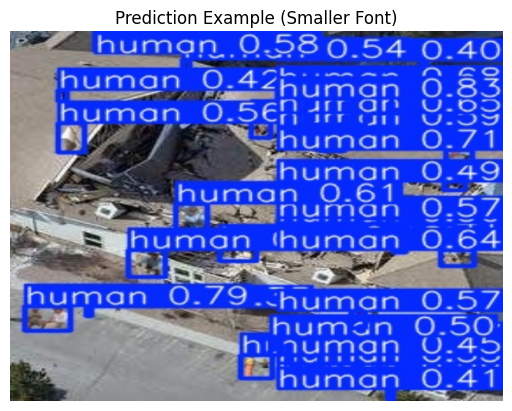

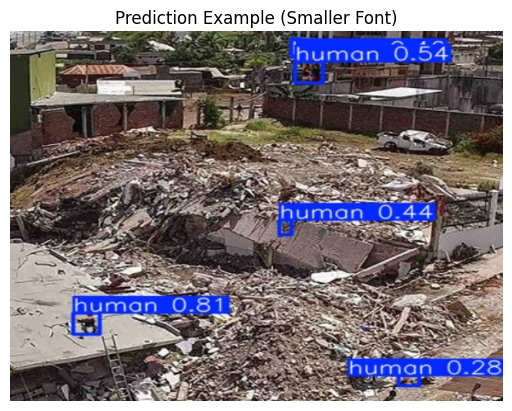

In [ ]:

# install yolov8

!pip install ultralytics split-folders matplotlib --quiet

import os, random
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO
import splitfolders


input_folder = "/content/drive/MyDrive/data/c2a dataset"

print("Dataset structure:", os.listdir(input_folder))


output_folder = "/content/drive/MyDrive/data/dataset_split"

splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=42,
    ratio=(.7, .2, .1)  # 70% train, 20% val, 10% test
)


test_img_dir = os.path.join(output_folder, "test/images")


yaml_content = f"""
path: {output_folder}
train: train/images
val: val/images
test: test/images

nc: 1
names: ['human']
"""

with open("/content/drive/MyDrive/data/data.yaml", "w") as f:
    f.write(yaml_content)

print("data.yaml created at /content/drive/MyDrive/data/data.yaml")


train_img_folder = os.path.join(output_folder, "train/images")
train_lbl_folder = os.path.join(output_folder, "train/labels")

rand_img = random.choice(os.listdir(train_img_folder))
img_path = os.path.join(train_img_folder, rand_img)
lbl_path = os.path.join(train_lbl_folder, rand_img.replace(".jpg", ".txt").replace(".png", ".txt"))


img = cv2.imread(img_path)
h, w, _ = img.shape


with open(lbl_path, "r") as f:
    for line in f.readlines():
        cls, x_c, y_c, bw, bh = map(float, line.strip().split())
        x1 = int((x_c - bw/2) * w)
        y1 = int((y_c - bh/2) * h)
        x2 = int((x_c + bw/2) * w)
        y2 = int((y_c + bh/2) * h)
        cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)

        cv2.putText(img, "human", (x1,y1-5),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.4,
                    (0,255,0),
                    1,
                    cv2.LINE_AA)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Random Training Image with Labels")
plt.axis("off")
plt.show()

model = YOLO("yolov8n.pt")

model.train(
    data="/content/drive/MyDrive/data/data.yaml",
    epochs=30,
    imgsz=640,
    batch=16,
    device=0
)


metrics = model.val(data="/content/drive/MyDrive/data/data.yaml")
print("Evaluation Metrics:", metrics)


results = model.predict(
    source=[os.path.join(test_img_dir, x) for x in os.listdir(test_img_dir)[:5]],
    conf=0.25,
    save=True
)

print("Predictions saved in:", results[0].save_dir)


pred_folder = results[0].save_dir
sample_preds = os.listdir(pred_folder)

for i in range(min(3, len(sample_preds))):
    img = cv2.imread(os.path.join(pred_folder, sample_preds[i]))


    img = cv2.resize(img, (640, 480))

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Prediction Example (Smaller Font)")
    plt.axis("off")
    plt.show()




---



---



---
# 🍇 Crowd Detection and Geotagging


---



---



---






0: 640x640 33 humans, 5.3ms
1: 640x640 31 humans, 5.3ms
2: 640x640 23 humans, 5.3ms
3: 640x640 5 humans, 5.3ms
4: 640x640 37 humans, 5.3ms
Speed: 2.6ms preprocess, 5.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


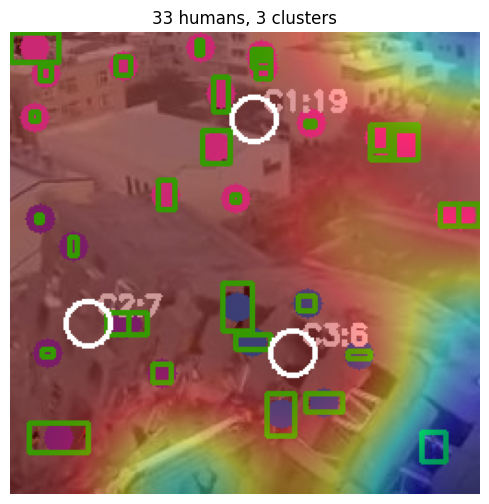

Waypoints (ordered by importance): [(np.int64(132), np.int64(47)), (np.int64(42), np.int64(158)), (np.int64(153), np.int64(174))]


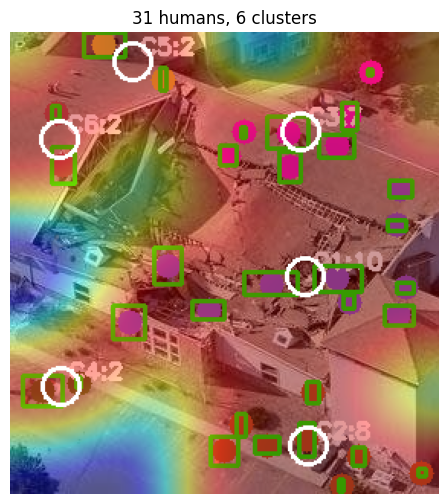

Waypoints (ordered by importance): [(np.int64(193), np.int64(160)), (np.int64(195), np.int64(271)), (np.int64(190), np.int64(65)), (np.int64(33), np.int64(232)), (np.int64(80), np.int64(19)), (np.int64(32), np.int64(70))]


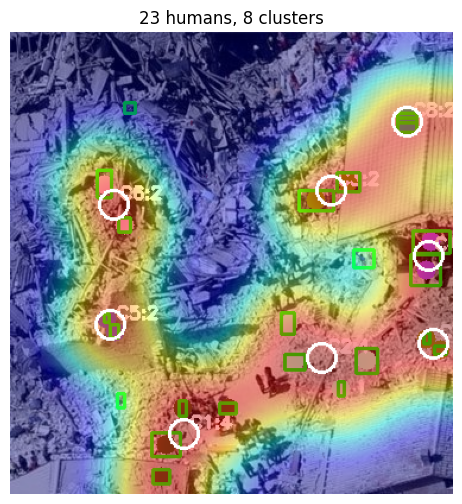

Waypoints (ordered by importance): [(np.int64(146), np.int64(338)), (np.int64(262), np.int64(274)), (np.int64(270), np.int64(133)), (np.int64(352), np.int64(188)), (np.int64(84), np.int64(246)), (np.int64(87), np.int64(145)), (np.int64(356), np.int64(262)), (np.int64(334), np.int64(75))]


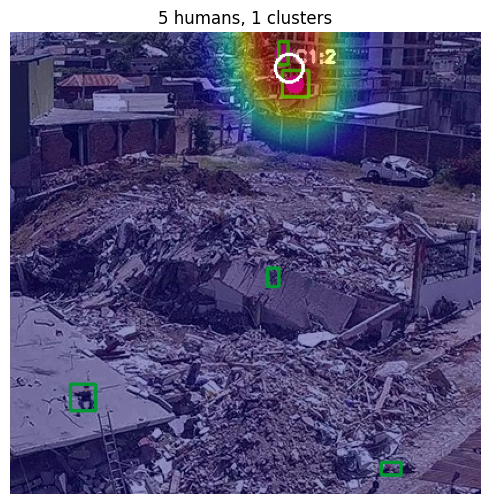

Waypoints (ordered by importance): [(np.int64(242), np.int64(31))]


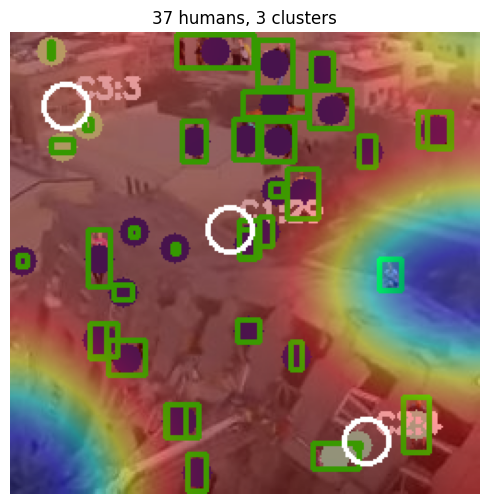

Waypoints (ordered by importance): [(np.int64(119), np.int64(107)), (np.int64(193), np.int64(222)), (np.int64(30), np.int64(40))]


In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import cv2
import matplotlib.pyplot as plt


eps_distance = 50
min_samples = 2


crowd_results = model.predict(
    source=[os.path.join(test_img_dir, x) for x in os.listdir(test_img_dir)[:5]],
    conf=0.25
)

for r in crowd_results:
    img = r.orig_img.copy()
    boxes = r.boxes.xyxy.cpu().numpy()
    num_people = len(boxes)

    centroids = np.array([[int((x1+x2)/2), int((y1+y2)/2)] for (x1,y1,x2,y2) in boxes])

    heatmap = np.zeros((img.shape[0], img.shape[1]), dtype=np.float32)

    waypoints = []      # cluster centroids
    cluster_sizes = []

    if len(centroids) > 0:
        clustering = DBSCAN(eps=eps_distance, min_samples=min_samples).fit(centroids)
        labels = clustering.labels_
        unique_labels = set(labels) - {-1}

        for cluster_id in unique_labels:
            cluster_points = centroids[labels == cluster_id]
            cluster_center = np.mean(cluster_points, axis=0).astype(int)
            waypoints.append(tuple(cluster_center))
            cluster_sizes.append(len(cluster_points))


            color = tuple(np.random.randint(0,255,3).tolist())
            for pt in cluster_points:
                cx, cy = pt
                cv2.circle(img, (cx, cy), 8, color, -1)
                cv2.circle(heatmap, (cx, cy), 40, 1, -1)


        sorted_clusters = sorted(zip(waypoints, cluster_sizes), key=lambda x: x[1], reverse=True)
        prioritized_waypoints = [wp for wp, size in sorted_clusters]


        for idx, (wp, size) in enumerate(sorted_clusters):
            cv2.putText(img, f"C{idx+1}:{size}", (wp[0]+5, wp[1]-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)


    for (x1, y1, x2, y2) in boxes:
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)


    heatmap = cv2.GaussianBlur(heatmap, (0,0), sigmaX=25, sigmaY=25)
    heatmap = cv2.normalize(heatmap, None, 0, 255, cv2.NORM_MINMAX)
    heatmap = cv2.applyColorMap(heatmap.astype(np.uint8), cv2.COLORMAP_JET)
    overlay = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

    for wp in prioritized_waypoints:
        cv2.circle(overlay, wp, 12, (255,255,255), 2)


    plt.figure(figsize=(8,6))
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title(f"{num_people} humans, {len(prioritized_waypoints)} clusters")
    plt.axis("off")
    plt.show()

    print("Waypoints (ordered by importance):", prioritized_waypoints)
